In [98]:
# pip install vaderSentiment

## Loading Libraries

In [163]:
import pandas as pd
import numpy as np
import datetime
import glob
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Match Data

In [164]:
match_data = pd.read_excel("../data/ManUtd Matches.xlsx")

In [165]:
match_data

,Opponent,Date,Outcome,Score
0,Leeds United,2021-08-14,Won,5-1
1,Southampton,2021-08-22,Draw,1-1
2,Wolves,2021-08-29,Won,1-0
3,Newcastle United,2021-09-11,Won,4-1
4,Young Boys,2021-09-14,Won,1-0
5,West Ham,2021-09-19,Won,2-1
6,West Ham,2021-09-22,Lost,0-1
7,Aston Villa,2021-09-25,Lost,0-1
8,Villareal,2021-09-29,Won,2-1
9,Everton,2021-10-02,Draw,1-1


## Analysing Sentiments of Official Twitter Accounts

In [172]:
def getMatchSentiments(file):
    dataset = pd.read_csv(file)
    dataset = dataset.drop(columns = ["Unnamed: 0"])
    analyzer = SentimentIntensityAnalyzer()
    dataset["sentiment_compound_score"] = dataset["Text"].apply(lambda x : analyzer.polarity_scores(str(x)))
    df = pd.json_normalize(dataset['sentiment_compound_score'])
    dataset_updated = pd.merge(dataset, df, how="inner", right_index = True, left_index= True)
    dataset_updated["sentiment"] = dataset_updated["compound"].apply(lambda x : "Positive" if (x > 0.05) else ("Neutral" if (x > -0.05 and x < 0.05) else "Negative"))
    display(dataset_updated.head(2))
    value_counts = dataset_updated["sentiment"].value_counts().to_frame().T
    return value_counts

In [173]:
files = []
for file in glob.glob("../data/Fan Tweets/*"):
    filefile.replace("\\","/")
    files.append(file)

In [180]:
match_sentiments = pd.DataFrame(columns = ["Date", "Outcome", "Positive", "Negative", "Neutral"])
for file in files:
    match_date = datetime.datetime.strptime(file.split("/")[3].split(".")[0]+" 2021", '%d-%b %Y')
    print("Reading Match Sentiments for - ", match_date)
    value_counts = getMatchSentiments(file)
    match_data["Date"] = match_data["Date"].apply(lambda x : str(x))
    outcome = match_data[match_data["Date"] == str(match_date)]["Outcome"].values[0]
    display(value_counts)
    display(outcome)
    df = pd.DataFrame([[match_date, outcome, value_counts["Positive"]["sentiment"], value_counts["Negative"]["sentiment"], value_counts["Neutral"]["sentiment"]]], columns = ["Date", "Outcome", "Positive", "Negative", "Neutral"])
    match_sentiments = match_sentiments.append(df)

Reading Match Sentiments for -  2021-10-24 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-10-24 21:46:00+00:00,1452390945656168448,❤️\n\n#MUFC | #MUNLIV https://t.co/5DAnEB52lc,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutral
1,2021-10-24 20:31:00+00:00,1452372071346958336,Our captain spoke to #MUTV after #MUNLIV.\n\n#...,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutral


,Neutral,Positive,Negative
sentiment,30,17,2


'Lost'

Reading Match Sentiments for -  2021-10-02 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-10-02 22:28:00+00:00,1444428982238134273,Landmark reached in 58 #PL appearances 🎯\n\n#M...,ManUtd,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.0,0.787,0.213,0.1779,Positive
1,2021-10-02 21:02:00+00:00,1444407339986083844,Up and running in 2021/22 👊\n\n@AnthonyMartial...,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,Neutral


,Neutral,Positive,Negative
sentiment,24,16,6


'Draw'

Reading Match Sentiments for -  2021-09-25 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-09-25 19:42:04+00:00,1441850509565087751,Your support 👏\n\n#MUFC | @D_DeGea https://t.c...,ManUtd,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...",0.000,0.722,0.278,0.4019,Positive
1,2021-09-25 17:36:00+00:00,1441818782981181441,"""It's a very disappointing day. There are no e...",ManUtd,"{'neg': 0.306, 'neu': 0.542, 'pos': 0.152, 'co...",0.306,0.542,0.152,-0.6901,Negative


,Neutral,Positive,Negative
sentiment,21,16,8


'Lost'

Reading Match Sentiments for -  2021-11-02 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-11-02 23:31:59+00:00,1455679110974517256,"🗣 ""I'm proud that we never give up. We never g...",ManUtd,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",0.0,0.881,0.119,0.4767,Positive
1,2021-11-02 23:06:00+00:00,1455672569152016389,ℹ️ Our no.19 had to be replaced in the first h...,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,Neutral


,Neutral,Positive,Negative
sentiment,28,25,7


'Draw'

Reading Match Sentiments for -  2021-09-11 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-09-11 23:08:46+00:00,1436829099343949826,Congratulations on becoming the #USOpen champi...,ManUtd,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.0,0.701,0.299,0.8439,Positive
1,2021-09-11 21:37:00+00:00,1436806002486046722,"☝️ @Cristiano ☝️\n\nSweet dreams, Reds 🥰 https...",ManUtd,"{'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compou...",0.0,0.480,0.520,0.9186,Positive


,Positive,Neutral,Negative
sentiment,43,35,10


'Won'

Reading Match Sentiments for -  2021-09-19 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-09-19 21:30:00+00:00,1439703345069916162,Those full-time scenes were 𝘀𝗽𝗲𝗰𝗶𝗮𝗹 ❤\n\n#MUFC...,ManUtd,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.0,0.704,0.296,0.6369,Positive
1,2021-09-19 21:00:00+00:00,1439695794873982976,🚀 @JesseLingard launching rockets!\n\n#MUFC | ...,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,Neutral


,Neutral,Positive,Negative
sentiment,28,26,4


'Won'

Reading Match Sentiments for -  2021-11-06 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-11-06 17:13:00+00:00,1457033285322919937,🗣 Bruno's assessment of #MUNMCI.\n\n#MUFC,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutral
1,2021-11-06 15:41:00+00:00,1457010132928270346,💬 Ole reacts to #MUNMCI. \n\n#MUFC,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutral


,Neutral,Positive,Negative
sentiment,19,15,4


'Lost'

Reading Match Sentiments for -  2021-08-22 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-08-22 21:02:00+00:00,1429549437467172877,"𝗣𝗣 𝘅 𝗠𝗚\n\nAnother assist for @PaulPogba, anot...",ManUtd,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",0.138,0.862,0.0,-0.3400,Negative
1,2021-08-22 17:05:00+00:00,1429489794409771016,"🗣 ""It's a point from a losing position but it'...",ManUtd,"{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'comp...",0.067,0.933,0.0,-0.2023,Negative


,Positive,Neutral,Negative
sentiment,24,17,5


'Draw'

Reading Match Sentiments for -  2021-11-20 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-11-20 19:08:30+00:00,1462135781800263680,Ole's post-match reaction.\n\n#MUFC | #WATMUN,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000,Neutral
1,2021-11-20 16:55:04+00:00,1462102202588270605,Defeat at Vicarage Road.\n\n#MUFC | #WATMUN,ManUtd,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",0.333,0.667,0.0,-0.4588,Negative


,Neutral,Positive,Negative
sentiment,23,16,2


'Lost'

Reading Match Sentiments for -  2021-08-14 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-08-14 23:04:00+00:00,1426681036818325506,Seeing a full Old Trafford made Saturday's res...,ManUtd,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",0.000,0.735,0.265,0.8777,Positive
1,2021-08-14 22:26:00+00:00,1426671473633071104,For those we lost during the pandemic ❤️\n\n#M...,ManUtd,"{'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'comp...",0.161,0.839,0.000,-0.3182,Negative


,Positive,Neutral,Negative
sentiment,52,33,6


'Won'

Reading Match Sentiments for -  2021-09-14 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-09-14 20:55:00+00:00,1437882596495695880,"Win together, lose together. Keep your head up...",ManUtd,"{'neg': 0.138, 'neu': 0.667, 'pos': 0.195, 'co...",0.138,0.667,0.195,0.2732,Positive
1,2021-09-14 20:01:41+00:00,1437869180158676998,"💬 ""A missed opportunity, of course, but we hav...",ManUtd,"{'neg': 0.056, 'neu': 0.877, 'pos': 0.067, 'co...",0.056,0.877,0.067,0.0772,Positive


,Neutral,Positive,Negative
sentiment,25,14,5


'Won '

Reading Match Sentiments for -  2021-09-22 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-09-22 23:24:56+00:00,1440819433161703425,Ole's post-match reaction includes a word on M...,ManUtd,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",0.0,0.881,0.119,0.4019,Positive
1,2021-09-22 21:38:46+00:00,1440792712739840002,"Over 72,000 fans in attendance at Old Trafford...",ManUtd,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound...",0.0,0.900,0.100,0.4404,Positive


,Neutral,Positive,Negative
sentiment,17,16,6


'Lost'

Reading Match Sentiments for -  2021-11-28 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-11-28 22:48:00+00:00,1465090123956035586,👏 Big up our travelling Reds and everyone that...,ManUtd,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.0,0.897,0.103,0.3182,Positive
1,2021-11-28 22:00:01+00:00,1465078047665647620,𝙄𝙘𝙚 𝙞𝙣 𝙝𝙞𝙨 𝙫𝙚𝙞𝙣𝙨 🧊\n\n🥶 @Sanchooo10\n\n#MUFC |...,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,Neutral


,Neutral,Positive,Negative
sentiment,36,10,6


'Draw'

Reading Match Sentiments for -  2021-10-20 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-10-20 23:32:00+00:00,1450968070193762311,😍 https://t.co/rL94SlgEIT,ManUtd,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.0,0.571,0.429,0.4588,Positive
1,2021-10-20 23:14:00+00:00,1450963540169265160,"Oh what a night, oh what a night 🥰\n\n#MUFC | ...",ManUtd,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.0,0.673,0.327,0.8074,Positive


,Positive,Neutral,Negative
sentiment,32,31,6


'Won'

Reading Match Sentiments for -  2021-10-30 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-10-30 22:48:00+00:00,1454580875673288705,Our away fans in fine voice as always 👏👏👏\n\n#...,ManUtd,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",0.0,0.904,0.096,0.2023,Positive
1,2021-10-30 22:35:00+00:00,1454577604262957058,Together ✊\n\nThank you for your magnificent s...,ManUtd,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.0,0.606,0.394,0.8442,Positive


,Neutral,Positive,Negative
sentiment,39,31,7


'Won'

Reading Match Sentiments for -  2021-09-29 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-09-29 23:58:00+00:00,1443364467862130688,Admin can't sleep...\n\nAnyone else? 😅,ManUtd,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",0.0,0.762,0.238,0.3612,Positive
1,2021-09-29 23:30:00+00:00,1443357421875912705,"𝗡𝗲𝘄 𝗺𝗲𝘀𝘀𝗮𝗴𝗲 (𝟭)\n\nTake it away, @AT13Oficial ...",ManUtd,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.0,0.824,0.176,0.4588,Positive


,Positive,Neutral,Negative
sentiment,32,28,11


'Won'

Reading Match Sentiments for -  2021-11-23 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-11-23 23:00:02+00:00,1463281213376897028,Top spot = secured 🔐\n\n#MUFC | #UCL,ManUtd,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.0,0.640,0.360,0.5423,Positive
1,2021-11-23 22:30:00+00:00,1463273655366926340,"We heard you loud and clear all night, Reds 📣\...",ManUtd,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.0,0.682,0.318,0.9022,Positive


,Positive,Neutral,Negative
sentiment,31,30,5


'Won'

Reading Match Sentiments for -  2021-10-16 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-10-16 18:26:00+00:00,1449441511129554946,"As always, thank you to our travelling fans fo...",ManUtd,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.000,0.606,0.394,0.8442,Positive
1,2021-10-16 17:51:45+00:00,1449432894708060160,The boss has shared his thoughts after today's...,ManUtd,"{'neg': 0.195, 'neu': 0.649, 'pos': 0.156, 'co...",0.195,0.649,0.156,-0.1531,Negative


,Neutral,Positive,Negative
sentiment,20,14,3


'Lost'

Reading Match Sentiments for -  2021-08-29 00:00:00


,Datetime,Tweet Id,Text,Username,sentiment_compound_score,neg,neu,pos,compound,sentiment
0,2021-08-29 23:57:00+00:00,1432130192428843009,𝗘𝗱𝗶 𝗶𝘀 𝗯𝗮𝗰𝗸! 🤩\n\n#MUFC | @ECavaniOfficial htt...,ManUtd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,Neutral
1,2021-08-29 23:02:00+00:00,1432116351510925316,Your support at Molineux on Sunday was incredi...,ManUtd,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.0,0.857,0.143,0.4574,Positive


,Positive,Neutral,Negative
sentiment,35,31,5


'Won'

## Visualising Match Sentiments for Official Accounts

In [181]:
match_sentiments.reset_index().drop(columns = ["index"])
match_sentiments["pos_neg_ratio"] = match_sentiments["Positive"]/match_sentiments["Negative"]
match_sentiments = match_sentiments.round({'pos_neg_ratio': 2})
match_sentiments["Outcome"] = match_sentiments["Outcome"].apply(lambda x : x.strip())
# match_sentiments["overall_sentiment"] = match_sentiments["overall_sentiment"].replace(True, "Positive")
# match_sentiments["overall_sentiment"] = match_sentiments["overall_sentiment"].replace(False, "Negative")
match_sentiments

,Date,Outcome,Positive,Negative,Neutral,pos_neg_ratio
0,2021-10-24,Lost,17,2,30,8.5
0,2021-10-02,Draw,16,6,24,2.666667
0,2021-09-25,Lost,16,8,21,2.0
0,2021-11-02,Draw,25,7,28,3.571429
0,2021-09-11,Won,43,10,35,4.3
0,2021-09-19,Won,26,4,28,6.5
0,2021-11-06,Lost,15,4,19,3.75
0,2021-08-22,Draw,24,5,17,4.8
0,2021-11-20,Lost,16,2,23,8.0
0,2021-08-14,Won,52,6,33,8.666667


This visualisation shows that regardless of the match outcomes, the sentiment of official accounts remains positive. 

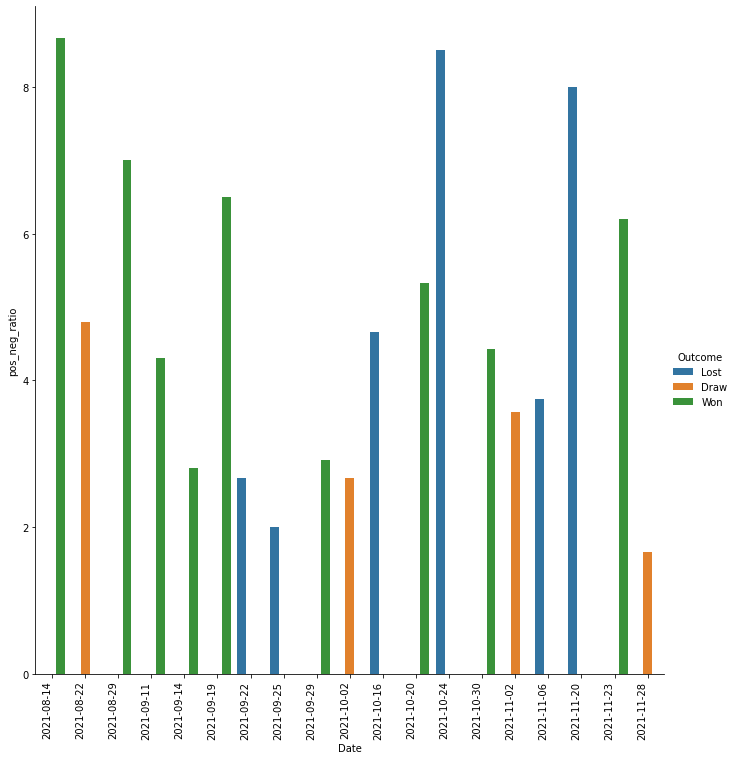

In [182]:
ax = sns.catplot(x="Date", y="pos_neg_ratio", hue="Outcome", kind="bar", data=match_sentiments, height=10, aspect=1)
x_dates = match_sentiments['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

This visualisation clearly shows that we have more positive sentiment tweets than negative sentiment tweets in official player and as well as team accounts.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Sentiment Count')

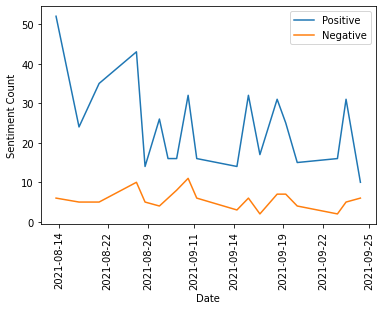

In [183]:
ax = sns.lineplot(x="Date", y="Positive", data = match_sentiments, label="Positive")
ax = sns.lineplot(x="Date", y="Negative", data = match_sentiments, label="Negative")
ax.set_xticklabels(labels=x_dates, rotation=90)
ax.set_ylabel("Sentiment Count")